### Lendo e validando os dados

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
colunas = "age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income".split(',')
base = pd.read_csv('adult.csv', names=colunas)

In [3]:
base.head(3)

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
# Não possui valores negativos.
base.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Nenhuma coluna possui valores nulos.
base.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [6]:
# Boa parte da base possui income menor que 50k.
# np.unique(base['income'], return_counts=True)
base['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

### Visualizando os dados

<AxesSubplot:xlabel='income', ylabel='count'>

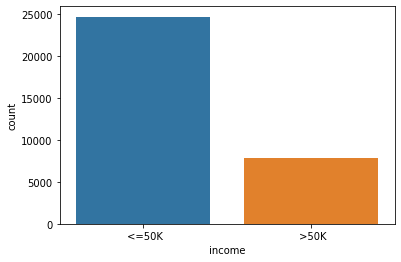

In [7]:
sns.countplot(x=base['income']) #

In [8]:
grafico = px.treemap(base, path=[px.Constant('Start'), 'income', 'age', 'education'])
grafico.show()

In [9]:
grafico = px.treemap(base, path=[px.Constant('Start'), 'income', 'native-country'], color_continuous_scale='RdBu')
grafico.show()

In [10]:
grafico = px.parallel_categories(base, dimensions=['income', 'sex', 'education'])
grafico.show()

### Divisão entre previsores e classe

In [11]:
# X representa os previsores
X_census = base.iloc[:, 0:14].values
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [12]:
# Y representa a classe (valor a ser "advinhado")
y_census = base.iloc[:, 14].values
y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
lbl_workclass = LabelEncoder()
lbl_education = LabelEncoder()
lbl_marital_status = LabelEncoder()
lbl_occupation = LabelEncoder()
lbl_relationship = LabelEncoder()
lbl_race = LabelEncoder()
lbl_sex = LabelEncoder()
lbl_native_country = LabelEncoder()

In [15]:
X_census[:, 1] = lbl_workclass.fit_transform(X_census[:, 1])
X_census[:, 3] = lbl_education.fit_transform(X_census[:, 3])
X_census[:, 5] = lbl_marital_status.fit_transform(X_census[:, 5])
X_census[:, 6] = lbl_occupation.fit_transform(X_census[:, 6])
X_census[:, 7] = lbl_relationship.fit_transform(X_census[:, 7])
X_census[:, 8] = lbl_race.fit_transform(X_census[:, 8])
X_census[:, 9] = lbl_sex.fit_transform(X_census[:, 9])
X_census[:, 13] = lbl_native_country.fit_transform(X_census[:, 13])

In [16]:
X_census[0]

array([39, 7, 77516, 9, 13, 4, 1, 1, 4, 1, 2174, 0, 40, 39], dtype=object)

### OneHot encoder

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [18]:
# Informar quais colunas deveram ser atribuidas o OneHotEncoder.
# remainder serve para manter os valores iguais nas colunas nao elegiveis ao OneHotEncoder.
one_hot_encoder = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], 
    remainder="passthrough"
    )

In [19]:
X_census = one_hot_encoder.fit_transform(X_census).toarray()

In [20]:
X_census[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [21]:
X_census.shape

(32561, 108)

### Escalonamento de valores

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()
X_census = scaler.fit_transform(X_census)

In [24]:
X_census[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

### Separando bases para treino e teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste = train_test_split(X_census, y_census, test_size=0.15, random_state=0)

In [27]:
X_census_treinamento.shape, y_census_treinamento.shape	

((27676, 108), (27676,))

In [28]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

### Salvando bases de treino e teste

In [54]:
import pickle

In [55]:
with open('census_adult.pkl', 'wb') as file:
    pickle.dump([X_census_treinamento, X_census_teste, y_census_treinamento, y_census_teste], file)

### Modelo Naive Bayes - GaussianNB

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento, y_census_treinamento)

GaussianNB()

In [31]:
previsao = naive_census.predict(X_census_teste)

### Metricas - Naive Bayes

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
acuracia = accuracy_score(y_census_teste, previsao)
print("O modelo Naive Bayes Gaussiano obteve uma acuracia de {:.2f}%".format(acuracia*100))

O modelo Naive Bayes Gaussiano obteve uma acuracia de 47.68%


In [46]:
confusion_matrix(y_census_teste, previsao)

array([[1172, 2521],
       [  35, 1157]], dtype=int64)

In [43]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

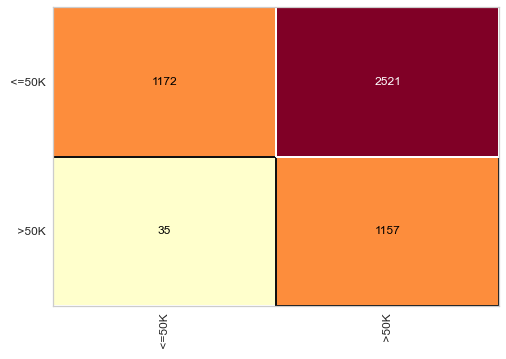

In [45]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)

In [48]:
print(classification_report(y_census_teste, previsao))
# para a coluna <=50k ele conseguiu classificar corretamente 97% dos valores em que o modelo enquadrou.
# para a coluna >50k ele conseguiu classificar 31% corretamente os valores enquadrados.

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

